In [1]:
import sys
sys.path.append('..')

from wiki_crawler import wiki_graph
from importlib import reload

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
reload(wiki_graph)
graph = wiki_graph.WikiGraph(
    "https://en.wikipedia.org/wiki/Effective_Altruism"
)
print(graph.base_page.get_page_info())
graph.build_graph(depth=1)


Page url: https://en.wikipedia.org/wiki/Effective_Altruism
Root url: https://en.wikipedia.org
Language code: en
Article length (compressed): 67899 (22929)
Language lengths dataframe build: False
# of article to article links: 428
# languages available: 28


In [3]:
df = graph.get_lengths_languages_dataframe(
    only_use_these_languages=[
        "en", 
        "zh", #mandarin
        #"hi", #hindi
        "es",
        "fr",
        "de"
    ]
)
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, https://en.wikipedia.org/wiki/Effective_Altruism to https://en.wikipedia.org/wiki/Examine.com
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   en      301 non-null    float64
 1   zh      116 non-null    float64
 2   es      156 non-null    float64
 3   fr      165 non-null    float64
 4   de      157 non-null    float64
dtypes: float64(5)
memory usage: 22.2+ KB
None


,en,zh,es,fr,de
url,,,,,
https://en.wikipedia.org/wiki/Effective_Altruism,22929.0,7454.0,16510.0,18627.0,17091.0
https://en.wikipedia.org/wiki/Peter_Singer,32490.0,8780.0,17132.0,9709.0,8650.0
https://en.wikipedia.org/wiki/The_Most_Good_You_Can_Do,3631.0,NaN,NaN,NaN,NaN
https://en.wikipedia.org/wiki/Conway_Hall,8666.0,NaN,NaN,925.0,773.0
https://en.wikipedia.org/wiki/Philosophy,33863.0,36705.0,69940.0,42451.0,37609.0
https://en.wikipedia.org/wiki/Social_movement,22397.0,6367.0,9017.0,9222.0,10811.0
https://en.wikipedia.org/wiki/Scientific_evidence,9362.0,NaN,1426.0,5805.0,NaN
https://en.wikipedia.org/wiki/Reasoning,34390.0,2784.0,5527.0,9809.0,11071.0
https://en.wikipedia.org/wiki/Altruism,28506.0,4016.0,6662.0,7748.0,27614.0


<AxesSubplot:>

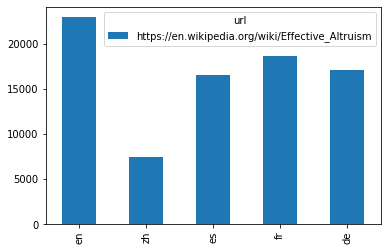

In [4]:
# plot language lengths of one article
df.filter(regex="Effective_Altruism$", axis="index").T.plot(kind="bar")

In [7]:
# show articles with missing languages
df[df.isna().any(axis=1)].sort_values(by="en").tail(20)

,en,zh,es,fr,de
url,,,,,
https://en.wikipedia.org/wiki/Counterfactual_conditional,14443.0,3318.0,1461.0,NaN,3333.0
https://en.wikipedia.org/wiki/Nick_Bostrom,15591.0,NaN,9961.0,3708.0,6064.0
https://en.wikipedia.org/wiki/David_Brooks_(journalist),16193.0,NaN,2894.0,2689.0,2412.0
https://en.wikipedia.org/wiki/Alms,16502.0,NaN,2324.0,1724.0,3445.0
https://en.wikipedia.org/wiki/Warm-glow_giving,17831.0,NaN,NaN,NaN,NaN
https://en.wikipedia.org/wiki/Women%27s_empowerment,18196.0,NaN,NaN,NaN,NaN
https://en.wikipedia.org/wiki/Volunteering,18295.0,NaN,9661.0,13410.0,28288.0
https://en.wikipedia.org/wiki/Aid_effectiveness,19714.0,NaN,23420.0,NaN,957.0
https://en.wikipedia.org/wiki/Prosocial_behavior,21452.0,1459.0,NaN,23041.0,NaN


In [11]:
# topics with short articles in a language compared to other languages
threshold_fraction_of_max = 0.3

df_copy = df.copy()
df_copy["threshold"] = df_copy.max(axis="columns") * threshold_fraction_of_max

df[
    df.apply(lambda x: x < df_copy["threshold"], axis=0).any(axis=1)
].sort_values(by="en").tail(20)
 

,en,zh,es,fr,de
url,,,,,
https://en.wikipedia.org/wiki/Reasoning,34390.0,2784.0,5527.0,9809.0,11071.0
https://en.wikipedia.org/wiki/Risk_assessment,34880.0,1768.0,6918.0,7390.0,3090.0
https://en.wikipedia.org/wiki/Meat,36516.0,10650.0,37419.0,30968.0,7136.0
https://en.wikipedia.org/wiki/Animal_suffering,38031.0,10083.0,7185.0,14534.0,3221.0
https://en.wikipedia.org/wiki/Nuclear_warfare,38181.0,9343.0,26452.0,8512.0,7771.0
https://en.wikipedia.org/wiki/Cultured_meat,41547.0,6417.0,8881.0,27485.0,7933.0
https://en.wikipedia.org/wiki/Global_catastrophic_risk,44265.0,16243.0,39243.0,48930.0,13563.0
https://en.wikipedia.org/wiki/Existential_risk,44277.0,16243.0,39243.0,48930.0,13563.0
"https://en.wikipedia.org/wiki/Risks_to_civilization,_humans,_and_planet_Earth",44290.0,16243.0,39243.0,48930.0,13563.0
